## **Fashion Mnist Prediction Model**

@ Prepared By: Chandan D. Chaudhari

In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Datasets from keras library
from keras.datasets import mnist

In [3]:
# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
# Checking shape of the Dataset
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

The train_image[0] label is :  4


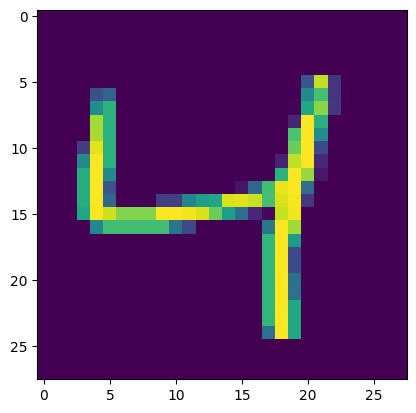

In [5]:
# Visualization
plt.imshow(train_X[2])
print(f'The train_image[0] label is : ',train_y[2])

The train_image[1] label is :  0


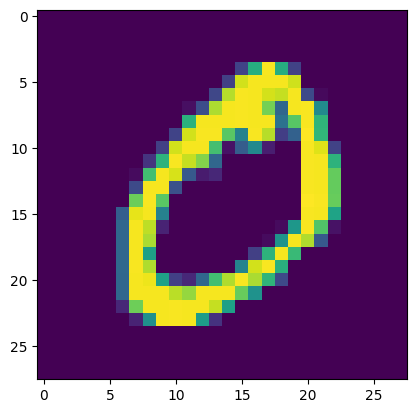

In [6]:
# Visualization
plt.imshow(train_X[1])
print('The train_image[1] label is : ',train_y[1])

## **Checking Different Images with Some Random Numbers**

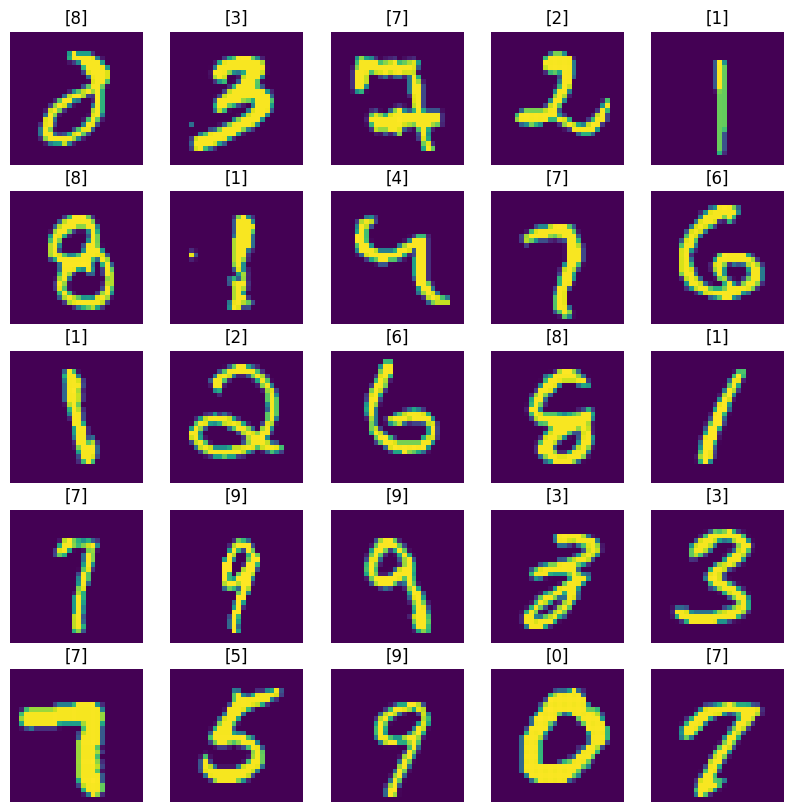

In [7]:
import random
plt.figure(figsize = (10,10))
for i in range(25):
    index = random.randint(0,60000)
    plt.subplot(5,5,i+1)
    plt.imshow(train_X[index])
    plt.title([train_y[index]])
    plt.axis('off')

## **Model Building**

- Input Layers = 28*28

- OutPut Layers = 10 , For MNIST, since it's a 10-class classification problem (digits 0-9), the output layer has 10 neurons, each corresponding to one class.

- Loss =

In [8]:
import tensorflow
tensorflow.random.set_seed(42)

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu')) # Input Layer
model.add(Dense(60,activation = 'relu'))  # Hidden Layer
model.add(Dense(40,activation = 'relu'))  # Hidden Layer
model.add(Dense(10,activation = 'softmax'))   # Output Layer

In [9]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_X,train_y,epochs = 10,validation_data = (test_X,test_y))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7513 - loss: 2.6735 - val_accuracy: 0.9131 - val_loss: 0.3295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9260 - loss: 0.2811 - val_accuracy: 0.9411 - val_loss: 0.2307
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9469 - loss: 0.1921 - val_accuracy: 0.9535 - val_loss: 0.1799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9595 - loss: 0.1488 - val_accuracy: 0.9455 - val_loss: 0.2168
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9622 - loss: 0.1315 - val_accuracy: 0.9587 - val_loss: 0.1598
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9689 - loss: 0.1102 - val_accuracy: 0.9637 - val_loss: 0.1396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9716 - loss: 0.0998 - val_accuracy: 0.9567 - val_loss: 0.1795
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9749 - loss: 0.0

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,212 (1.27 MB)

 Trainable params: 111,070 (433.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,142 (867.75 KB)

In [12]:
y_pred = model.predict(test_X)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.42159317e-10, 2.63770410e-08, 2.46813681e-10, ...,
        9.99980390e-01, 1.28865755e-14, 1.88879912e-05],
       [3.48157089e-19, 2.01521768e-11, 9.99999583e-01, ...,
        3.04052435e-07, 4.64072520e-13, 4.68200622e-24],
       [6.08028678e-16, 9.99746919e-01, 2.56502641e-09, ...,
        2.42647788e-04, 1.04677229e-05, 4.67978545e-10],
       ...,
       [4.88384536e-24, 3.64284042e-13, 5.36571549e-17, ...,
        1.70674530e-14, 3.65455053e-18, 1.05013859e-10],
       [1.47297570e-07, 6.65018707e-09, 8.90751977e-14, ...,
        1.05587949e-09, 6.23553888e-06, 6.00835347e-06],
       [6.20310400e-11, 1.00060616e-15, 1.93612634e-16, ...,
        0.00000000e+00, 6.72430792e-11, 8.67509307e-17]], dtype=float32)

In [13]:
# argmax : This function finds the index of the maximum value along the specified axis.
y_pred_class = y_pred.argmax(axis = 1)
y_pred_class
y_pred_class[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

The test_image[0] label is :  7


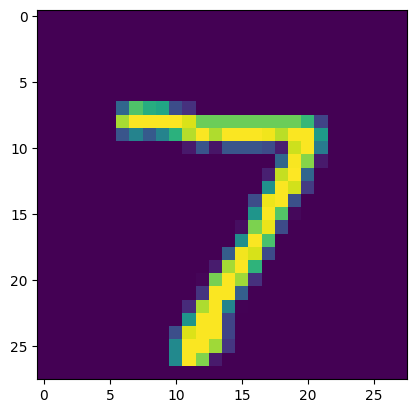

In [14]:
plt.imshow(test_X[0])
print('The test_image[0] label is : ',test_y[0])

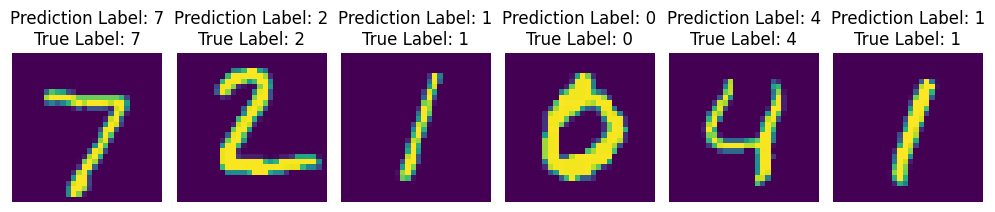

In [15]:
num_images = 6  # Number of images to display
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)

    # Display the image
    plt.imshow(test_X[i])

    # Display the predicted and actual labels
    predicted_label = y_pred_class[i]
    true_label      = test_y[i]

    plt.title(f"Prediction Label: {predicted_label}\nTrue Label: {true_label}")

    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()